# Titanic Disaster 

---
title: 'Exploring the Titanic Dataset'
author: 'Megan L. Risdal'
date: '6 March 2016'
output:
  html_document:
    number_sections: true
    toc: true
    fig_width: 7
    fig_height: 4.5
    theme: readable
    highlight: tango
---

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

C:\Users\mbelkhei\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None ) # The kwargs acts like a dictionary. when using kwargs.get[key], it returns value of key
    col = kwargs.get( 'col' , None ) 
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col ) # use facetgrid to plt different graphs
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [24]:
macro_list=['timestamp', 'oil_urals', 'gdp_quart_growth', 'cpi','ppi', 'usdrub',
            'salary_growth', 'unemployment', 'average_provision_of_build_contract_moscow',
            'mortgage_rate','deposits_rate','deposits_growth','rent_price_3room_eco','rent_price_3room_bus',
            'grp_growth', 'balance_trade_growth', 'mortgage_rate', 'mortgage_growth','retail_trade_turnover_growth',
            'marriages_per_1000_cap', 'divorce_rate', 'construction_value', 'pop_migration', 'childbirth', 'mortality',
            'rent_price_4+room_bus', 'rent_price_3room_bus','rent_price_2room_bus', 'rent_price_1room_bus',
            'rent_price_3room_eco', 'rent_price_2room_eco','rent_price_1room_eco']


In [25]:
train = pd.read_csv("housing/train.csv", parse_dates=['timestamp'])
test = pd.read_csv("housing/test.csv", parse_dates=['timestamp'])
macro = pd.read_csv("housing/macro.csv", parse_dates=['timestamp'], usecols=macro_list)
macro ['price']= train['price_doc']

train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [ ]:
train.head()

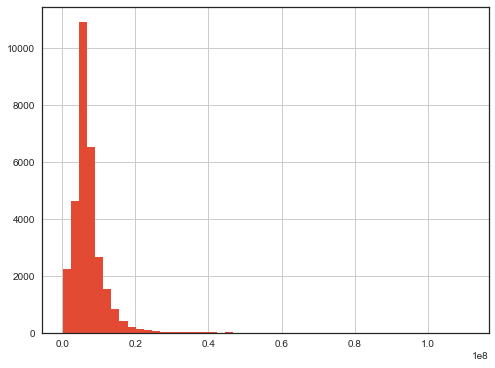

In [26]:
ax = train['price_doc'].hist(bins=50)

In [27]:
# ylog will be log(1+y), as suggested by https://github.com/dmlc/xgboost/issues/446#issuecomment-135555130
ylog_train_all = np.log1p(train['price_doc'].values)
id_test = test['id']

train.drop(['id', 'price_doc'], axis=1, inplace=True)
test.drop(['id'], axis=1, inplace=True)

# Build df_all = (df_train+df_test).join(df_macro)
num_train = len(train)
df_all = pd.concat([train, test])
df_all = pd.merge_ordered(df_all, macro, on='timestamp', how='left')
print(df_all.shape)

# Add month-year
month_year = (df_all.timestamp.dt.month + df_all.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
df_all['month_year_cnt'] = month_year.map(month_year_cnt_map)

# Add week-year count
week_year = (df_all.timestamp.dt.weekofyear + df_all.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
df_all['week_year_cnt'] = week_year.map(week_year_cnt_map)

# Add month and day-of-week
df_all['month'] = df_all.timestamp.dt.month
df_all['dow'] = df_all.timestamp.dt.dayofweek

# Other feature engineering
df_all['rel_floor'] = df_all['floor'] / df_all['max_floor'].astype(float)
df_all['rel_kitch_sq'] = df_all['kitch_sq'] / df_all['full_sq'].astype(float)

# Remove timestamp column (may overfit the model in train)
df_all.drop(['timestamp'], axis=1, inplace=True)

(38133, 319)


In [28]:
# Deal with categorical values
df_numeric = df_all.select_dtypes(exclude=['object'])
df_obj = df_all.select_dtypes(include=['object']).copy()

for c in df_obj:
    df_obj[c] = pd.factorize(df_obj[c])[0]

df_values = pd.concat([df_numeric, df_obj], axis=1)

In [29]:
# Convert to numpy values
X_all = df_values.values
print(X_all.shape)

# Create a validation set, with last 20% of data
num_val = int(num_train * 0.2)

X_train_all = X_all[:num_train]
X_train = X_all[:num_train-num_val]
X_val = X_all[num_train-num_val:num_train]
ylog_train = ylog_train_all[:-num_val]
ylog_val = ylog_train_all[-num_val:]

X_test = X_all[num_train:]

df_columns = df_values.columns

print('X_train_all shape is', X_train_all.shape)
print('X_train shape is', X_train.shape)
print('y_train shape is', ylog_train.shape)
print('X_val shape is', X_val.shape)
print('y_val shape is', ylog_val.shape)
print('X_test shape is', X_test.shape)

(38133L, 324L)
('X_train_all shape is', (30471L, 324L))
('X_train shape is', (24377L, 324L))
('y_train shape is', (24377L,))
('X_val shape is', (6094L, 324L))
('y_val shape is', (6094L,))
('X_test shape is', (7662L, 324L))


In [30]:
import xgboost as xgb
dtrain_all = xgb.DMatrix(X_train_all, ylog_train_all, feature_names=df_columns)
dtrain = xgb.DMatrix(X_train, ylog_train, feature_names=df_columns)
dval = xgb.DMatrix(X_val, ylog_val, feature_names=df_columns)
dtest = xgb.DMatrix(X_test, feature_names=df_columns)

In [59]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 2,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

# Uncomment to tune XGB `num_boost_rounds`
partial_model = xgb.train(xgb_params, dtrain, num_boost_round=1000, evals=[(dval, 'val')],
                       early_stopping_rounds=20, verbose_eval=20)

num_boost_round = partial_model.best_iteration

[0]	val-rmse:13.7219
Will train until val-rmse hasn't improved in 20 rounds.
[20]	val-rmse:1.81886
[40]	val-rmse:0.532439
[60]	val-rmse:0.448161
[80]	val-rmse:0.437528
[100]	val-rmse:0.432856
[120]	val-rmse:0.429919
[140]	val-rmse:0.427461
[160]	val-rmse:0.426132
[180]	val-rmse:0.425039
[200]	val-rmse:0.424052
[220]	val-rmse:0.423222
[240]	val-rmse:0.422788
[260]	val-rmse:0.422038
[280]	val-rmse:0.421699
[300]	val-rmse:0.420872
[320]	val-rmse:0.420421
[340]	val-rmse:0.419992
[360]	val-rmse:0.419768
[380]	val-rmse:0.419579
[400]	val-rmse:0.419321
[420]	val-rmse:0.419015
[440]	val-rmse:0.418893
[460]	val-rmse:0.418623
[480]	val-rmse:0.418715
[500]	val-rmse:0.418557
[520]	val-rmse:0.418498
[540]	val-rmse:0.418291
[560]	val-rmse:0.418337
Stopping. Best iteration:
[543]	val-rmse:0.418193



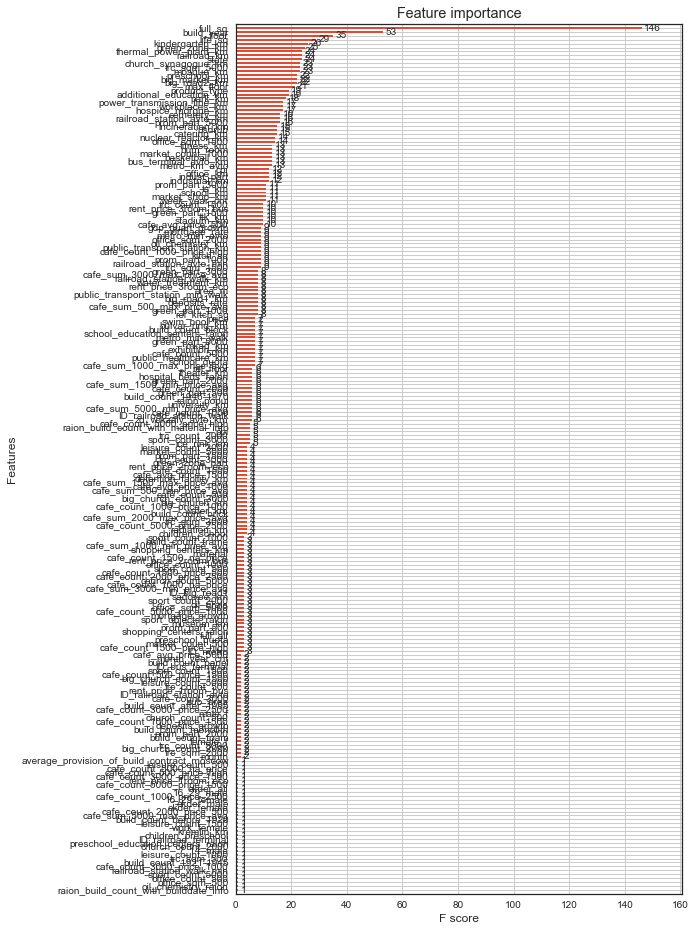

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(partial_model, height=0.5, ax=ax)

In [61]:
num_boost_round = partial_model.best_iteration
model = xgb.train(dict(xgb_params, silent=0), dtrain_all, num_boost_round=num_boost_round)



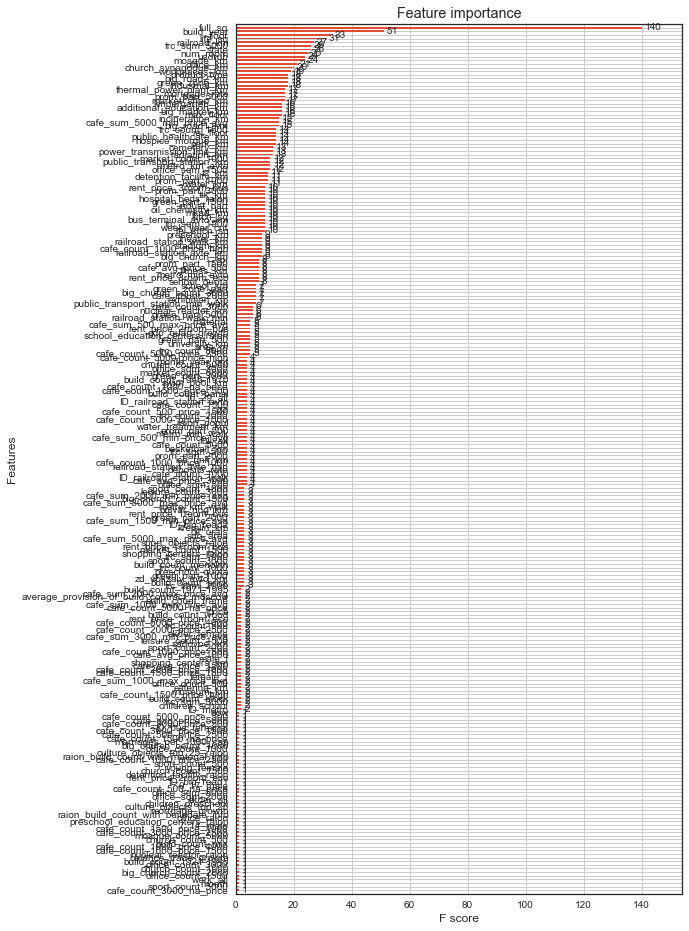

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(model, height=0.5, ax=ax)

In [63]:
ylog_pred = model.predict(dtest)
y_pred = np.exp(ylog_pred) - 1

df_sub = pd.DataFrame({'id': id_test, 'price_doc': y_pred})

df_sub.to_csv('sub.csv', index=False)

In [ ]:
anlz_df.head()

In [ ]:
test.describe()

In [ ]:
test.describe(include=['O'])

In [ ]:
train.describe()

In [ ]:
train.describe(include=['O'])

### from the describe method we notice:
#### Train (891 values) is missing 
177 Age values, 687 Cabin values, and 2 Embarked values
#### Test (418 values) is missing
86 Age values, 1 Fare value, and 327 Cabin values 

#### observation 
Cabin has large propotion of missing values, we may start thinking of discarding it


In [ ]:
plot_correlation_map(train)

In [ ]:
>>> plt.scatter(train['Age'][train['Survived']==0], train['Fare'][train['Survived']==0]**0.35,
... color='red', marker='^', alpha=0.5)
>>> plt.scatter(train['Age'][train['Survived']==1], train['Fare'][train['Survived']==1]**0.35,
... color='blue', marker='o', alpha=0.5)
>>> plt.show()

In [ ]:
plot_distribution( train , var = 'Age' , target='Survived', row = 'Sex')

In [ ]:
plot_distribution( train , var = 'Fare' , target = 'Survived' , row = 'Sex' )

In [ ]:
plot_categories( train , cat = 'Embarked' , target = 'Survived' )

In [ ]:
plot_categories( train , cat = 'Sex' , target = 'Survived' )

In [ ]:
plot_categories( train , cat = 'Pclass' , target = 'Survived' )

In [ ]:
plot_categories( train , cat = 'SibSp' , target = 'Survived' )

In [ ]:
plot_categories( train , cat = 'Parch' , target = 'Survived' )

In [ ]:
train[train['Fare'].isnull()]

In [ ]:
test[test['Fare'].isnull()]

In [ ]:
sns.boxplot(x="Sex", y="Fare", hue='Pclass', data=test)

In [ ]:
def fill_missing_fare(df):
    median_fare=df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]['Fare'].median()
#'S'
       #print(median_fare)
    df["Fare"] = df["Fare"].fillna(median_fare)
    return df
test=fill_missing_fare(test)

In [ ]:
train[train['Embarked'].isnull()]

In [ ]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train)

In [ ]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Sex','Fare', 'Pclass', palette='deep')
grid.add_legend()

In [ ]:
train["Embarked"] = train["Embarked"].fillna('C')

In [ ]:
#train = pd.read_csv("titanic/train.csv") #import csv file


#Embarked_mapping = {'C':0, 'S':1, 'Q':2}
#train['Embarked'] = train['Embarked'].map(Embarked_mapping)
#embarked = pd.get_dummies(full.Embarked, prefix="Embarked")

#plot_correlation_map(train)

In [ ]:
#plot_distribution( train , var = 'Fare' , target = 'Survived'  )

In [ ]:
#train = pd.read_csv("titanic/train.csv") #import csv file
#train= train[(train['Fare']>50) & (train['Fare']<70)]
#train = train.reset_index(drop=True)
#plot_correlation_map(train)

In [ ]:
train.describe(), test.describe()

In [ ]:
train.describe(include=['O']), test.describe(include=['O'])

In [ ]:
# from the describe, we observe that Age and cabin are the only missing values in both sets. we are going to apply 
# predictive imputation. We will start by combining both sets in one set.

In [ ]:
full = train.append(test, ignore_index=True)

In [ ]:
#plot_distribution(train , var = 'Fare' , target = 'Survived' , row = 'Sex' )

In [ ]:
print('number of missing Age in train dataset', train['Age'].isnull().sum())
print('number of missing Age in train dataset', test['Age'].isnull().sum())
print('number of missing Age in train dataset', full['Age'].isnull().sum())

In [ ]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(full["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="red")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

In [ ]:
# For age prediction we are going to use a Randomforestregressor. but first we need to map Sex values as follows: male:0, female:1

In [ ]:
def age_sex(passenger):
    age, sex = passenger
    if age <1:
        return 'baby'
    elif age >= 1 and age< 18:
        return 'child'
    else:
        return sex
full['Sex'] = full[['Age','Sex']].apply(age_sex,axis=1)
Sex_mapping = {'male':0, 'female':1, 'child':2, 'baby':3}
full['Sex'] = full['Sex'].map(Sex_mapping)

In [ ]:
sns.countplot(x="Sex", hue="Survived", data=full)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#predicting missing values in age using Random Forest
def fill_missing_age(df):
    
    #Feature set
    age_df = df[['Age','Fare', 'Parch', 'SibSp',
                 'Pclass', 'Sex']]
    # Split sets into train and test
    train  = age_df.loc[ (df.Age.notnull()) ]# known Age values
    test = age_df.loc[ (df.Age.isnull()) ]# null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

In [ ]:
full =fill_missing_age(full)

In [ ]:
# The new distribution of age

In [ ]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(full["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100));

In [ ]:
# Next we impute for Cabin. 
full.Cabin.describe()

In [ ]:
# in this imputation we want to have cabin listed from A to T

In [ ]:
full[ 'Cabin' ] = full[ 'Cabin' ].fillna( 'X' )
full['Cabin'] = full['Cabin'].map( lambda c : c[0] )

In [ ]:
full.Cabin.value_counts()

In [ ]:
print('number of missing cabin in train dataset', train['Cabin'].isnull().sum())
print('number of missing cabin in train dataset', test['Cabin'].isnull().sum())
print('number of missing cabin in train dataset', full['Cabin'].isnull().sum())

In [ ]:
#train_cabin = pd.DataFrame()
# replacing missing cabins with U (for Uknown)
#train_cabin = full[['Cabin','Pclass', 'Fare', 'Sex', 'Age', 'SibSp','Parch' ]]

sns.countplot(x="Cabin", hue="Pclass", data=full)

In [ ]:
sns.countplot(x="Cabin", hue="Pclass", data=full[full['Cabin']!='X'])

In [ ]:
#we can see that class 1 is having exclusively cabins: A,B,C,T, then there is D shared with Class 2, and E shared with class2 and 3
#class 3 is exclusively present in G and sharing E and F with class 2


In [ ]:
sns.boxplot(x="Cabin", y="Fare", hue='Pclass', data=full[(full['Cabin']!='X')&(full['Fare']<100)])

In [ ]:
#another way to assign unknown cabins is to assign by fare quantiles 
#cabin['Cabin'] = np.where((cabin.Cabin =='X') & (cabin.Pclass == 1) ,'E',cabin.Cabin)
#cabin['Cabin'] = np.where((cabin.Cabin =='E') & (cabin.Pclass == 1) & (cabin.Fare >= 52.0 ) ,'C',cabin.Cabin)
#cabin['Cabin'] = np.where((cabin.Cabin =='C') & (cabin.Pclass == 1) & (cabin.Fare >= 84.383350 ) ,'B',cabin.Cabin)

In [ ]:
full.head([['Cabin','Age','Sex','Fare','Parch','Pclass','SibSp']])

In [ ]:
def fill_missing_cabin(df):
    
    #Feature set
    cabin_df = df[['Cabin','Age','Sex','Fare','Parch','Pclass','SibSp']]

    # Split sets into train and test
    train_new  = cabin_df.loc[ (df.Cabin !='X') ]# known cabin
    test_new = cabin_df.loc[ (df.Cabin == 'X') ]# X cabin

    # All age values are stored in a target array
    y = train_new.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train_new.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedCabin = rtr.predict(test_new.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Cabin =='X'), 'Cabin' ] = predictedCabin
    
    return df

In [ ]:
full= fill_missing_cabin(full)

In [ ]:
full.describe(include=['O'])

In [ ]:
sns.countplot(x="Cabin", hue="Pclass", data=full)

In [ ]:
# Another way to impute cabin values is by assigning the unkown values to X
#full['Cabin'] = full['Cabin'].fillna('X')
#full['Cabin']= full['Cabin'].map( lambda c : c[0] )

In [ ]:
print ('Datasets', 'Full:', full.shape, 'train', train.shape, 'test', test.shape, )

In [ ]:
full.head()

## Features engineering

In [ ]:
embarked = pd.get_dummies(full.Embarked, prefix="Embarked")
embarked.head()

In [ ]:
pclass = pd.get_dummies( full.Pclass , prefix='Pclass' )
pclass.head()

In [ ]:
cabin = pd.get_dummies(full.Cabin, prefix='Cabin')
cabin.head()

In [ ]:
title = pd.DataFrame()
# we extract the title from each name
title[ 'Title' ] = full[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )
sorted(title.Title.unique())

In [ ]:
# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Rare",
                    "Col":        "Rare",
                    "Don":        "Rare",
                    "Dona":       "Rare",
                    "Dr":         "Rare",
                    "Jonkheer":   "Rare",
                    "Lady" :      "Rare",
                    "Major":      "Rare",
                    "Master" :    "Master",
                    "Miss" :      "Miss",
                    "Mlle":       "Miss",
                    "Mme":        "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Ms":         "Miss",
                    "Rev":        "Rare",
                    "Sir" :       "Rare",
                    "the Countess":"Rare"             
                    }

# we map each title
title[ 'Title' ] = title.Title.map( Title_Dictionary )
title = pd.get_dummies( title.Title )
#title = pd.concat( [ title , titles_dummies ] , axis = 1 )

title.head()

In [ ]:
full[ 'Title' ] = full[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )
full[ 'Title' ] = full.Title.map( Title_Dictionary )

In [ ]:
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
def cleanTicket( ticket ):
    ticket = ticket.replace( '.' , '' )
    ticket = ticket.replace( '/' , '' )
    ticket = ticket.split()
    ticket = map( lambda t : t.strip() , ticket )
    ticket = list(filter( lambda t : not t.isdigit() , ticket ))
    if len( ticket ) > 0:
        return ticket[0]
    else: 
        return 'XXX'

ticket = pd.DataFrame()

# Extracting dummy variables from tickets:
ticket[ 'Ticket' ] = full[ 'Ticket' ].map( cleanTicket )
ticket = pd.get_dummies( ticket[ 'Ticket' ] , prefix = 'Ticket' )

ticket.head()

In [ ]:
full['Ticket_Len'] = full['Ticket'].apply(lambda x: len(x))
ticketlen = full['Ticket_Len']

In [ ]:
full[ 'FamilySize' ] = full[ 'Parch' ] + full[ 'SibSp' ]+ 1

In [ ]:
sns.countplot(x="FamilySize", hue="Survived", data=full)

In [ ]:
family = pd.DataFrame()

# introducing a new feature : the size of families (including the passenger)
#family[ 'FamilySize' ] = full[ 'Parch' ] + full[ 'SibSp' ] + 1

# introducing other features based on the family size
family[ 'Family_Single' ] = full[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Family_Small' ]  = full[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
family[ 'Family_Large' ]  = full[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

family.head()

In [ ]:
#<1 [babies], >=1 to <7, >=7 to <15, >=15 to <20, >=20 to <=40, >40

In [ ]:
# <=7.7,>7.7 to <=10, >10 to <=15, >15 to <=25, >25 to <=30,>30 to <=40, >40 to <=52 , >52 to <=74, >74

In [ ]:
train['Pclass'][train.Survived==1].value_counts(normalize=False)

In [ ]:
full['Survived'][(full.Age<17)&(full.Age<17)].value_counts(normalize=False)

In [ ]:
full['Pclass'][(full.Age<1)].value_counts(normalize=False)

In [ ]:
full[(full.Age>=40)&(full.Age>=40)].count()

In [ ]:
#<1 [babies], >=1 to <7, >=7 to <15, >=15 to <20, >=20 to <=40, >40

In [ ]:
# <=7.7,>7.7 to <=10, >10 to <=15, >15 to <=25, >25 to <=30,>30 to <=40, >40 to <=52 , >52 to <=74, >74

In [ ]:
fare_bin = pd.DataFrame()
age_bin = pd.DataFrame()
fare_bin['Fare_Group'] = pd.cut(full['Fare'], bins = [0,7.7,10,15.01,25,30.05,40,52.1,74, full['Fare'].max()+1],right=False, labels = ['F_0','F_1','F_2','F_3','F_4','F_5','F_6','F_7','F_8' ])
fare_bin = pd.get_dummies( fare_bin['Fare_Group'] , prefix = 'bin' )
age_bin['Age_Group'] = pd.cut(full['Age'], bins = [0,1,7,15,20,40, full['Age'].max()+1],right=False, labels = ['A_0','A_1','A_2','A_3', 'A_4', 'A_5' ])
age_bin = pd.get_dummies( age_bin['Age_Group'] , prefix = 'bin' )

In [ ]:
age_bin['bin_A_5'].sum()

In [ ]:
#Create feture for length of name 
# The .apply method generates a new series
name = pd.DataFrame(full[['Name','Survived']])
name['NameLength'] = name["Name"].apply(lambda x: len(x))
bins = [0, 20, 40, 57, 85]
group_names = ['short', 'okay', 'good', 'long']
name['NlengthD'] = pd.cut(name['NameLength'], bins, labels=group_names)
#name['NlengthD']= labelEnc.fit_transform(name['NlengthD'].values)
LengthID_mapping = {'short':0,'okay':1, 'good':2, 'long':3}
name['NlengthD'] = name['NlengthD'].map(LengthID_mapping)
full['namelength'] = name['NlengthD']
sns.factorplot(x="NlengthD", y="Survived", data= name[:len(train)])
print(name[len(train):]["NlengthD"].unique())

In [ ]:
name = pd.get_dummies(name['NlengthD'], prefix= 'namelength')
name.head()

In [ ]:
adult = pd.DataFrame()
adult['adult'] = full[ 'Age'].map( lambda s : 1 if 18 <= s else 0 )
full['adult'] = adult['adult'] 
adult.head()

In [ ]:
mother = pd.DataFrame ()
mother['mother'] =  np.where((full.Sex ==1) & (full.Age > 18) & (full.Title !='Miss') & (full.Parch>0),1,0)
full['mother'] =  np.where((full.Sex ==1) & (full.Age > 18) & (full.Title !='Miss') & (full.Parch>0),1,0)

In [ ]:
parsib = full[['SibSp','Parch']]

In [ ]:
full_X = pd.concat( [pclass, sex, parsib,adult, mother, family,  title, embarked], axis=1 )
full_X.shape, train.shape, test.shape, full.shape

In [ ]:
agefare = pd.DataFrame()
agefare = full['Age']*full['Fare']

In [ ]:
full_X.drop(['Pclass_1'], axis=1, inplace=True)

In [ ]:
f_list[:2]

In [ ]:
full_X = full_X[features.variable[:26]]

In [ ]:
full_X.head()

# Machine learning

## Data split to Train and Test sets

In [ ]:
from sklearn.cross_validation import train_test_split
X = full_X[ 0:len(train) ]
y = train.Survived
test_submission = full_X[len(train):].values
X = X.values
y = y.values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print (full_X.shape , X_train.shape , X_test.shape , y_train.shape , y_test.shape , test_submission.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, scale
from sklearn.preprocessing import StandardScaler
stdsc = MinMaxScaler()
#X_std = scale(X)
#test_submission_std = scale(test_submission)
X_std = stdsc.fit_transform(X)
test_submission_std = stdsc.fit_transform(test_submission)


In [ ]:
>>> from sklearn.decomposition import KernelPCA
>>> scikit_kpca = KernelPCA(n_components=20,
... kernel='rbf', gamma=15)
>>> Y_sklearn = scikit_kpca.fit_transform(X_std)

In [ ]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=20)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [ ]:
>>> plt.scatter(Y_sklearn[y==0, 0], Y_sklearn[y==0, 1],
... color='red', marker='^', alpha=0.5)
>>> plt.scatter(Y_sklearn[y==1, 0], Y_sklearn[y==1, 1],
... color='blue', marker='o', alpha=0.5)
>>> plt.show()

In [ ]:
test_submission_std.shape

In [ ]:
>>> plt.scatter(Y_sklearn[y==0, 0], Y_sklearn[y==0, 2],
... color='red', marker='^', alpha=0.5)
>>> plt.scatter(Y_sklearn[y==1, 0], Y_sklearn[y==1, 2],
... color='blue', marker='o', alpha=0.5)
>>> plt.show()

In [ ]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=20)
Y_test_sklearn = sklearn_pca.fit_transform(test_submission_std)

In [ ]:
X_test_std.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
>>> from sklearn.cross_validation import cross_val_score
>>> scores = cross_val_score(estimator=SVC(), X=X_train, y=y_train,cv=10,n_jobs=1)
>>> print('CV accuracy scores: %s' % scores)
>>> print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
cv_svc_score = np.mean(scores)

In [ ]:
>>> from sklearn.preprocessing import StandardScaler
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.pipeline import Pipeline
#>>> model_svc = SVC(C=1.0, kernel='rbf',degree=3, coef0=0.0, shrinking=True, 
#                    probability=False, tol=0.001,  cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
#                    decision_function_shape=None, random_state=None)
svc = SVC(C=0.1, gamma=0.1, degree = 3, kernel ='rbf', decision_function_shape = 'ovo')
>>> param_grid = {}

>>> gs = GridSearchCV(estimator=svc,
... param_grid=param_grid,
... scoring='accuracy',
... cv=10,
... n_jobs=-1)
>>> gs = gs.fit(X_train, y_train)
>>> print(gs.best_score_)
>>> print(gs.best_params_)
>>> svc.fit(X_train, y_train)
>>> print('Test Accuracy: %.3f' % svc.score(X_test, y_test))

In [ ]:
>>> model_knn = KNeighborsClassifier(n_neighbors=26, n_jobs=-1)
>>> model_knn.fit(X_train, y_train)
>>> print('Test Accuracy: %.3f' % model_knn.score(X_test, y_test))
knn_score = model_knn.score(X_test, y_test)

In [ ]:
>>> scores = cross_val_score(estimator=model_knn, X=X_train, y=y_train,cv=10,n_jobs=1)
>>> print('CV accuracy scores: %s' % scores)
>>> print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
cv_knn_score = np.mean(scores)

In [ ]:
>>> model_lr = LogisticRegression(penalty='l1', C=1.0,intercept_scaling = 0.0001, fit_intercept='True' )

In [ ]:
>>> from sklearn.cross_validation import cross_val_score
>>> scores = cross_val_score(estimator= model_lr, X=X_train, y=y_train,cv=10,n_jobs=1)
>>> print('CV accuracy scores: %s' % scores)
>>> print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
cv_lr_score = np.mean(scores)

# Start here

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.47, random_state=42)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
# grid search helps identify the best estimator with best parameters (to use before learning and validation curves)
>>> from sklearn.grid_search import GridSearchCV
>>> param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
model_lr = LogisticRegression()
>>> param_grid = [{'penalty': ['l1'],
                   'fit_intercept': ['True','False'],
                   'C': param_range,
                   'intercept_scaling': param_range},
                  {'penalty': ['l2'],
                   'solver' : ['newton-cg', 'sag', 'lbfgs'],
                   'C': param_range}]
>>> gs = GridSearchCV(estimator=model_lr,
... param_grid=param_grid,
... scoring='accuracy',
... cv=5,
... n_jobs=-1)
>>> gs1 = gs.fit(X_train, y_train)
>>> print(gs.best_score_)
>>> print(gs.best_params_)

In [ ]:
# use the best estimator and test it
>>> clf1 = gs1.best_estimator_
>>> scores1 = cross_val_score(estimator=clf1, X=X_train, y=y_train,cv=10,n_jobs=1)
>>> print('CV accuracy scores: %s' % scores1)
>>> print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores1), np.std(scores1)))

In [ ]:
>>> clf1.fit(X_train, y_train)
>>> print('Test accuracy: %.3f' % clf1.score(X_test, y_test))

In [ ]:
forest = RandomForestClassifier(n_jobs=-1, max_features='sqrt', criterion='entropy', oob_score = 'True',
                                min_samples_split=10, min_samples_leaf=1,)

parameter_grid = {
                  'n_estimators':[100,200,300,500],
                  'max_depth' : [5,6,7,8]
                 }

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


In [ ]:
>>> clf2 = grid_search.best_estimator_
>>> clf2.fit(X_train, y_train)
>>> print('Test accuracy: %.3f' % clf2.oob_score_)
>>> print('Test accuracy: %.3f' % clf2.score(X_test, y_test))


In [ ]:
# use the best estimator and test it
>>> scores = cross_val_score(estimator=clf2, X=X_train, y=y_train,cv=10,n_jobs=1)
>>> print('CV accuracy scores: %s' % scores)
>>> print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [ ]:
features = pd.concat((pd.DataFrame(full_X.columns, columns = ['variable']), 
           pd.DataFrame(clf2.feature_importances_*100, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

In [ ]:
features

In [ ]:
from sklearn.tree import DecisionTreeClassifier
forest = DecisionTreeClassifier(max_features='sqrt')

parameter_grid = {'criterion' :['entropy','gini'],
                   'max_depth' : [5,6,7,8]
                 }

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


In [ ]:
>>> clf3 = grid_search.best_estimator_
>>> clf3.fit(X_train, y_train)
>>> print('Test accuracy: %.3f' % clf3.score(X_test, y_test))


In [ ]:
# learning curve is used to estimate if we could benefit from adding more sample to the dataset

import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=clf2,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid(b='on')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.show()

In [ ]:
# validation curve helps to have a closer at a specific hyperparamter and how much it affects the estimator
>>> from sklearn.learning_curve import validation_curve
>>> train_scores, test_scores = validation_curve(
... estimator=clf2,
... X=X_train,
... y=y_train,
... param_name='max_depth',
... param_range=range(4,10),
... cv=10)
>>> train_mean = np.mean(train_scores, axis=1)
>>> train_std = np.std(train_scores, axis=1)
>>> test_mean = np.mean(test_scores, axis=1)
>>> test_std = np.std(test_scores, axis=1)
>>> plt.plot(range(4,10), train_mean,
... color='blue', marker='o',
... markersize=5,
... label='training accuracy')
>>> plt.fill_between(range(4,10), train_mean + train_std,
... train_mean - train_std, alpha=0.15,
... color='blue')
>>> plt.plot(range(4,10), test_mean,color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
>>> plt.fill_between(range(4,10),
... test_mean + test_std,
... test_mean - test_std,
... alpha=0.15, color='green')
>>> plt.grid(b='on')
>>> plt.legend(loc='lower right')
>>> plt.xlabel('Max_features')
>>> plt.ylabel('Accuracy')
>>> plt.ylim([0.6, 1.0])
>>> plt.show()

In [ ]:
>>> from sklearn.metrics import confusion_matrix
>>> y_pred = clf2.predict(X_test)
>>> confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
>>> print(confmat)

In [ ]:
>>> fig, ax = plt.subplots(figsize=(2.5, 2.5))
>>> ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
>>> for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j], va='center', ha='center')
>>> plt.xlabel('predicted label')
>>> plt.ylabel('true label')
>>> plt.show()

In [ ]:
>>> from sklearn.metrics import precision_score
>>> from sklearn.metrics import recall_score, f1_score
>>> print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
>>> print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
>>> print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

In [ ]:
>>> from sklearn.metrics import roc_curve, auc
>>> from scipy import interp
>>> X_train2 = X_train
>>> cv = StratifiedKFold(y_train,
... n_folds=5,
... random_state=1)
>>> fig = plt.figure(figsize=(7, 5))
>>> mean_tpr = 0.0
>>> mean_fpr = np.linspace(0, 1, 100)
>>> all_tpr = []
>>> for i, (train1, test1) in enumerate(cv):
    probas = clf2.fit(X_train2[train1], y_train[train1]).predict_proba(X_train2[test1])
    fpr, tpr, thresholds = roc_curve(y_train[test1],probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,tpr,lw=1,label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
>>> plt.plot([0, 1],[0, 1],linestyle='--',color=(0.6, 0.6, 0.6),label='random guessing')
>>> mean_tpr /= len(cv)
>>> mean_tpr[-1] = 1.0
>>> mean_auc = auc(mean_fpr, mean_tpr)
>>> plt.plot(mean_fpr, mean_tpr, 'k--',label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
>>> plt.plot([0, 0, 1],[0, 1, 1],lw=2,linestyle=':',color='black',label='perfect performance')
>>> plt.xlim([-0.05, 1.05])
>>> plt.ylim([-0.05, 1.05])
>>> plt.xlabel('false positive rate')
>>> plt.ylabel('true positive rate')
>>> plt.title('Receiver Operator Characteristic')
>>> plt.legend(loc="lower right")
>>> plt.show()

In [ ]:
>>> from sklearn.ensemble import VotingClassifier

In [ ]:
>>> eclf1 = VotingClassifier(estimators=[('dt', clf3), ('rf', clf2)], voting='soft')
>>> eclf1 = eclf1.fit(X_train, y_train)
>>> print('Test accuracy: %.3f' % eclf1.score(X_test, y_test))

In [ ]:
>>> eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svc', svc)], voting='soft')
>>> eclf2 = eclf1.fit(X_train, y_train)
>>> print('Test accuracy: %.3f' % eclf1.score(X_test, y_test))

In [ ]:
clf2.fit(X,y)

In [ ]:
test_Y = clf2.predict( test_submission )
passenger_id = full[len(train):].PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_Y } )
test.shape
test.head()
test.to_csv( 'titanic_pred.csv' , float_format='%.f', index = False )

In [ ]:
plot_variable_importance(train_X, train_y)

In [ ]:
rfecv = RFECV( estimator =clf , step = 1 , cv = StratifiedKFold( y_train , 10 ) , scoring = 'accuracy' )
rfecv.fit( X_train , y_train )

print (rfecv.score( X_train , y_train ) , rfecv.score( X_test , y_test ))
print( "Optimal number of features : %d" % rfecv.n_features_ )

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel( "Number of features selected" )
plt.ylabel( "Cross validation score (nb of correct classifications)" )
plt.plot( range( 1 , len( rfecv.grid_scores_ ) + 1 ) , rfecv.grid_scores_ )
plt.show()